In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Reshape, Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [2]:
# Training data
train_dir= "data/train"
test_dir = "data/test"

In [3]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (64, 64),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary',
                                                  shuffle = True)
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary',
                                                 shuffle = True)

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [4]:
label_dict = {
0: "hot_dog",
1: "not_hot_dog"
}

In [5]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=training_data.image_shape))
model.add(Flatten())
model.add(Dense(128, activation='relu', input_shape = training_data.image_shape))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3936384   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 3,936,866
Trainable params: 3,936,866
Non-trainable params: 0
_________________________________________________________________


In [6]:
n_epochs = 16

model.fit(training_data,
          steps_per_epoch = 32,
          epochs=n_epochs,
          verbose=1)

Epoch 1/16
32/32 [==============================] - 4s 131ms/step - loss: 2.3198 - acc: 0.5141
Epoch 2/16
32/32 [==============================] - 4s 128ms/step - loss: 0.6900 - acc: 0.6044
Epoch 3/16
32/32 [==============================] - 4s 128ms/step - loss: 0.5935 - acc: 0.6737
Epoch 4/16
32/32 [==============================] - 4s 130ms/step - loss: 0.5199 - acc: 0.7420
Epoch 5/16
32/32 [==============================] - 4s 128ms/step - loss: 0.4756 - acc: 0.7610
Epoch 6/16
32/32 [==============================] - 4s 131ms/step - loss: 0.4051 - acc: 0.8223
Epoch 7/16
32/32 [==============================] - 4s 130ms/step - loss: 0.3966 - acc: 0.8444
Epoch 8/16
32/32 [==============================] - 4s 129ms/step - loss: 0.3237 - acc: 0.8695
Epoch 9/16
32/32 [==============================] - 4s 132ms/step - loss: 0.2845 - acc: 0.8976
Epoch 10/16
32/32 [==============================] - 4s 129ms/step - loss: 0.2197 - acc: 0.9247
Epoch 11/16
32/32 [==============================

Hyperparam Logs:
Conv2D:8, Dense:256 -> Acc:94

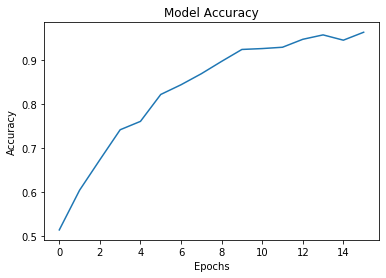

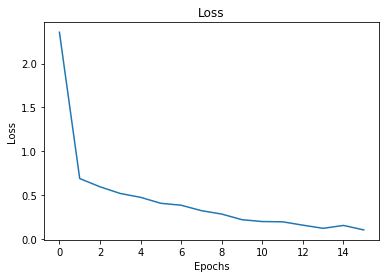

In [7]:
hst = model.history

# print(history.history.keys())

plt.plot(hst.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

plt.plot(hst.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [22]:
testimg = testing_data[0]
prediction = model.predict(testimg)
print(np.round(prediction))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
